In [46]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import accuracy_score
from warnings import filterwarnings
filterwarnings('ignore')



# Data preprocessing

In [30]:
df = pd.read_csv("Advertising.csv")

In [31]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [32]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [33]:
df.shape

(200, 5)

In [34]:
df.tail()

,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [35]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
radio         200 non-null float64
newspaper     200 non-null float64
sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


# Exploratory data analysis

In [37]:
df.corr()

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


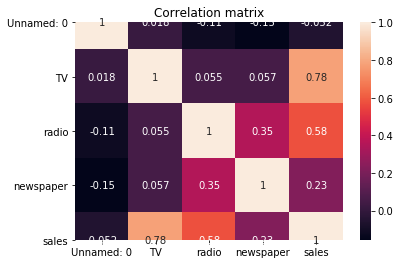

In [38]:
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation matrix')
plt.show()

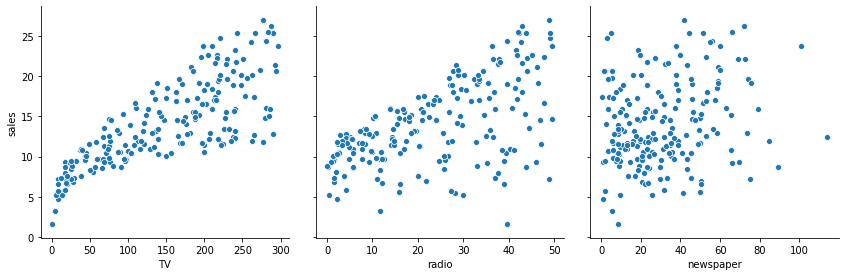

In [39]:
sns.pairplot(df,x_vars = ['TV','radio','newspaper'],y_vars='sales',size = 4)

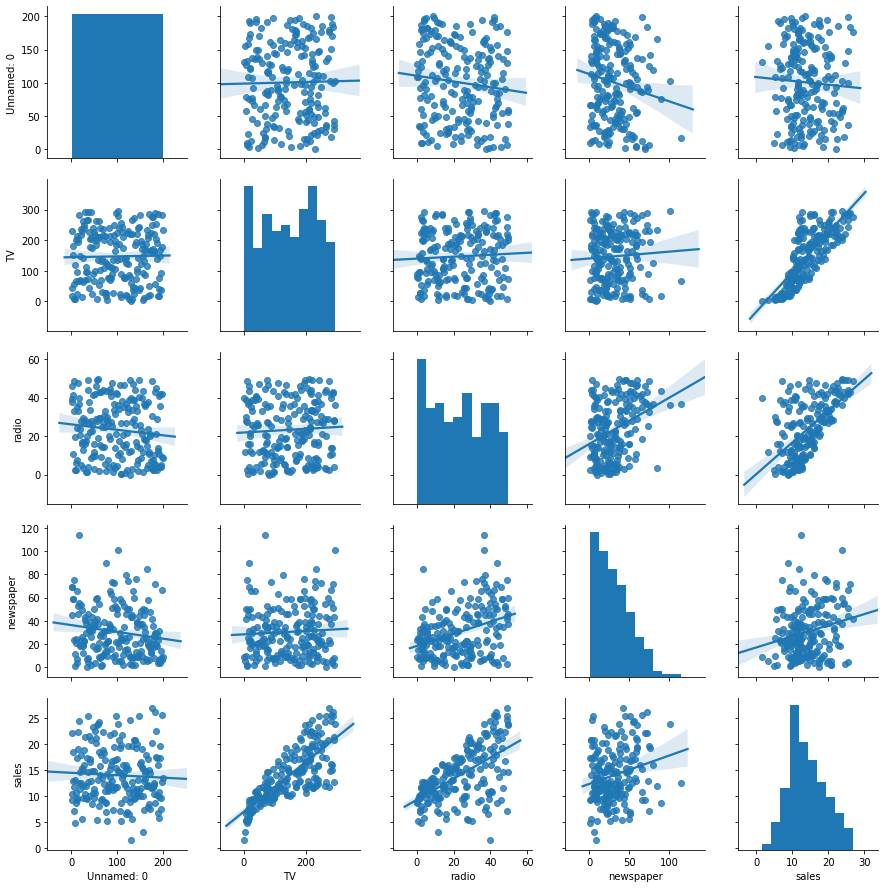

In [40]:
sns.pairplot(df, kind ='reg')

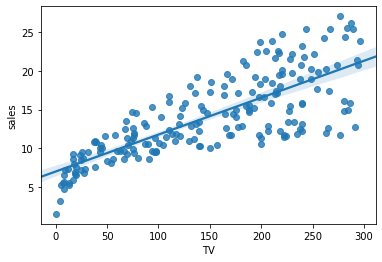

In [42]:
sns.regplot(df['TV'], df['sales'])

# splitting the data into training and test data

In [13]:
#Initializing the variables
X = df['TV'].values.reshape(-1,1)
y = df['sales'].values.reshape(-1,1)

In [14]:
print(X)

[[230.1]
 [ 44.5]
 [ 17.2]
 [151.5]
 [180.8]
 [  8.7]
 [ 57.5]
 [120.2]
 [  8.6]
 [199.8]
 [ 66.1]
 [214.7]
 [ 23.8]
 [ 97.5]
 [204.1]
 [195.4]
 [ 67.8]
 [281.4]
 [ 69.2]
 [147.3]
 [218.4]
 [237.4]
 [ 13.2]
 [228.3]
 [ 62.3]
 [262.9]
 [142.9]
 [240.1]
 [248.8]
 [ 70.6]
 [292.9]
 [112.9]
 [ 97.2]
 [265.6]
 [ 95.7]
 [290.7]
 [266.9]
 [ 74.7]
 [ 43.1]
 [228. ]
 [202.5]
 [177. ]
 [293.6]
 [206.9]
 [ 25.1]
 [175.1]
 [ 89.7]
 [239.9]
 [227.2]
 [ 66.9]
 [199.8]
 [100.4]
 [216.4]
 [182.6]
 [262.7]
 [198.9]
 [  7.3]
 [136.2]
 [210.8]
 [210.7]
 [ 53.5]
 [261.3]
 [239.3]
 [102.7]
 [131.1]
 [ 69. ]
 [ 31.5]
 [139.3]
 [237.4]
 [216.8]
 [199.1]
 [109.8]
 [ 26.8]
 [129.4]
 [213.4]
 [ 16.9]
 [ 27.5]
 [120.5]
 [  5.4]
 [116. ]
 [ 76.4]
 [239.8]
 [ 75.3]
 [ 68.4]
 [213.5]
 [193.2]
 [ 76.3]
 [110.7]
 [ 88.3]
 [109.8]
 [134.3]
 [ 28.6]
 [217.7]
 [250.9]
 [107.4]
 [163.3]
 [197.6]
 [184.9]
 [289.7]
 [135.2]
 [222.4]
 [296.4]
 [280.2]
 [187.9]
 [238.2]
 [137.9]
 [ 25. ]
 [ 90.4]
 [ 13.1]
 [255.4]
 [225.8]
 

In [17]:
print(y)

[[22.1]
 [10.4]
 [ 9.3]
 [18.5]
 [12.9]
 [ 7.2]
 [11.8]
 [13.2]
 [ 4.8]
 [10.6]
 [ 8.6]
 [17.4]
 [ 9.2]
 [ 9.7]
 [19. ]
 [22.4]
 [12.5]
 [24.4]
 [11.3]
 [14.6]
 [18. ]
 [12.5]
 [ 5.6]
 [15.5]
 [ 9.7]
 [12. ]
 [15. ]
 [15.9]
 [18.9]
 [10.5]
 [21.4]
 [11.9]
 [ 9.6]
 [17.4]
 [ 9.5]
 [12.8]
 [25.4]
 [14.7]
 [10.1]
 [21.5]
 [16.6]
 [17.1]
 [20.7]
 [12.9]
 [ 8.5]
 [14.9]
 [10.6]
 [23.2]
 [14.8]
 [ 9.7]
 [11.4]
 [10.7]
 [22.6]
 [21.2]
 [20.2]
 [23.7]
 [ 5.5]
 [13.2]
 [23.8]
 [18.4]
 [ 8.1]
 [24.2]
 [15.7]
 [14. ]
 [18. ]
 [ 9.3]
 [ 9.5]
 [13.4]
 [18.9]
 [22.3]
 [18.3]
 [12.4]
 [ 8.8]
 [11. ]
 [17. ]
 [ 8.7]
 [ 6.9]
 [14.2]
 [ 5.3]
 [11. ]
 [11.8]
 [12.3]
 [11.3]
 [13.6]
 [21.7]
 [15.2]
 [12. ]
 [16. ]
 [12.9]
 [16.7]
 [11.2]
 [ 7.3]
 [19.4]
 [22.2]
 [11.5]
 [16.9]
 [11.7]
 [15.5]
 [25.4]
 [17.2]
 [11.7]
 [23.8]
 [14.8]
 [14.7]
 [20.7]
 [19.2]
 [ 7.2]
 [ 8.7]
 [ 5.3]
 [19.8]
 [13.4]
 [21.8]
 [14.1]
 [15.9]
 [14.6]
 [12.6]
 [12.2]
 [ 9.4]
 [15.9]
 [ 6.6]
 [15.5]
 [ 7. ]
 [11.6]
 [15.2]
 [19.7]


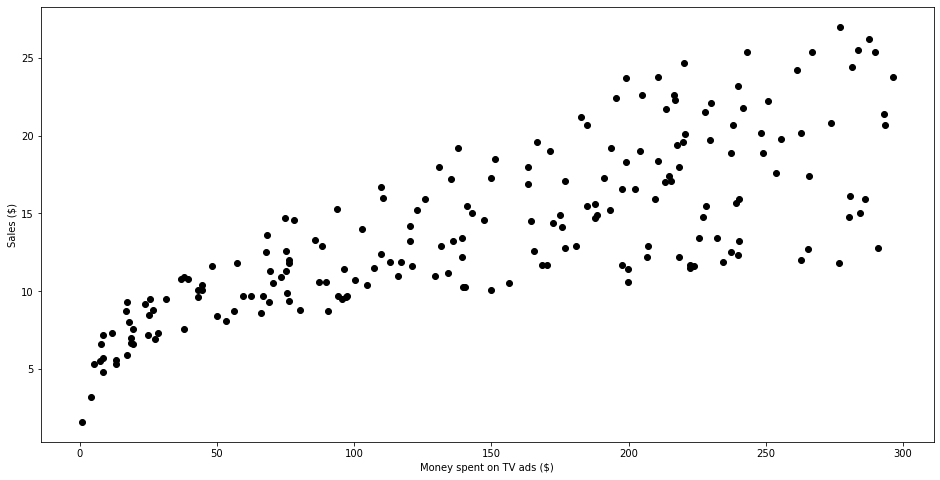

In [18]:
#Ploting a graph to see the points
plt.figure(figsize=(16, 8))
plt.scatter(X, y, c='black')
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

In [138]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

# Model training

In [139]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [140]:
X_pred_train = reg.predict(X_train)

In [141]:
err_score = r2_score(y_train,X_pred_train)

In [142]:
mean_err_score = mean_squared_error(y_train,X_pred_train)

In [143]:
print("mean squared error" , mean_err_score)

mean squared error 7.84253776926653


In [144]:
print("R squared error" , err_score)

R squared error 0.6986375970244381


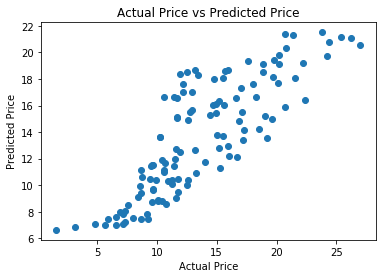

In [149]:
plt.scatter(y_train,X_pred_train)
plt.xlabel('Actual Price')
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

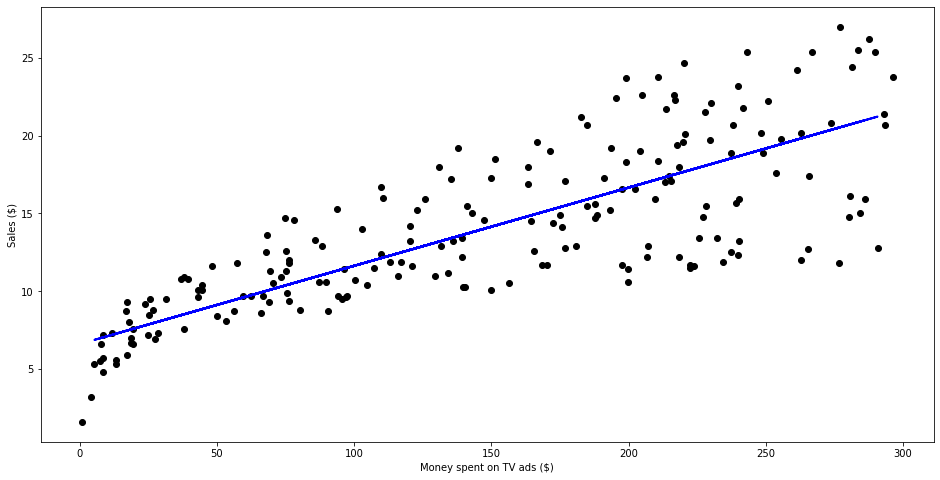

In [145]:
# predicting the test set results
y_pred = reg.predict(X_test)
plt.figure(figsize=(16, 8))
plt.scatter(X, y, c='black')
plt.plot(X_test,y_pred,c='blue',linewidth=2)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

In [146]:
#Calculating the Coefficients
reg.coef_

array([[0.05029767]])

In [147]:
#Calculating the Intercept
reg.intercept_

array([6.60441137])

In [150]:
output = reg.predict([[230.1]])
print('the price of the TV is : ',output)

the price of the TV is :  [[18.17790635]]
